In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os as os
#warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#path="C:\\Users\\Shalini.M\\OneDrive - Shell\\Shalini\\Work\\Celonis\\Late Payment Prediction\\Schema3"
#os.chdir(path)

In [44]:
df = pd.read_excel(r"C:\\Users\\Shalini.M\\OneDrive - Shell\\Shalini\\Work\\Celonis\\Late Payment Prediction\\Schema4\\Schema4_Input3.xlsx")
df

,CASE_KEY,ACTIVITY_EN,EVENTTIME,SORTING,Vendor Name,Country,City,Postal Code,Amount,Parked by,Payment Status
0,110AT0115000200222019001,Vendor Creates Invoice,2019-05-08 00:00:00,10.0,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time
1,110AT0115000200222019001,Acc. Doc. Baseline Date,2019-05-13 00:00:00,50.0,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time
2,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,2019-05-15 03:06:54,NaN,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time
3,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...,2019-05-23 11:09:07,NaN,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Select Appr from ...,2019-06-04 13:20:30,NaN,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time
...,...,...,...,...,...,...,...,...,...,...,...
499995,110US1615001054392019001,Accounting document Invoice line created,2019-06-27 14:38:55,10.0,KAG WEST LLC,US,CLEVELAND,44194-4313,494.620000,PHMCC6,On-Time
499996,110US1615001054392019001,Acc. Doc. Cleared,2019-07-25 23:59:59,50.0,KAG WEST LLC,US,CLEVELAND,44194-4313,494.620000,PHMCC6,On-Time
499997,110US1615001054392019001,Acc. Doc. Due Date Passed,2019-07-25 23:59:59,70.0,KAG WEST LLC,US,CLEVELAND,44194-4313,494.620000,PHMCC6,On-Time
499998,110US1615001054402019001,Vendor Creates Invoice,2019-06-24 00:00:00,10.0,PETRO-CHEMICAL TRANSPORT INC,US,CHARLOTTE,28260-0827,183.380000,PHWLI5,Early


In [27]:
df['Payment Status'].value_counts()

On-Time    254416
Late       173370
Early       71840
Name: Payment Status, dtype: int64

In [28]:
df_other['Payment Status'].value_counts()

2    12696
1     8980
0     4515
Name: Payment Status, dtype: int64

In [45]:
df_Early = pd.read_excel(r"C:\\Users\\Shalini.M\\OneDrive - Shell\\Shalini\\Work\\Celonis\\Late Payment Prediction\\Schema4\\early_Status1.xlsx")
df_Early

,Vendor Name,Late,Early,Ontime,early_Percent,late_Percent,ontime_Percent
0,BERLI DYNAPLAST COMPANY LIMITED,0,272,0,1.0,0.0,0.0
1,MULTI-COLOR (THAILAND) CO LTD,0,212,0,1.0,0.0,0.0
2,S.P. PETPACK CO LTD,0,168,0,1.0,0.0,0.0
3,"MASTER CAR RENTAL CO., LTD",0,79,0,1.0,0.0,0.0
4,ABCO-UNITED FOR PLASTICS AND,0,75,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
8522,IPS INTOPLANE SERVICE POOL,0,0,2,0.0,0.0,1.0
8523,IPSOS (CHINA) CONSULTING CO LTD,0,0,1,0.0,0.0,1.0
8524,IPSOS INSIGHT LLC,0,0,1,0.0,0.0,1.0
8525,IPSOS MORI UK LTD,1,0,1,0.0,0.5,0.5


In [46]:
df=pd.merge(df,df_Early,how='inner',on=['Vendor Name'])
df

,CASE_KEY,ACTIVITY_EN,EVENTTIME,SORTING,Vendor Name,Country,City,Postal Code,Amount,Parked by,Payment Status,Late,Early,Ontime,early_Percent,late_Percent,ontime_Percent
0,110AT0115000200222019001,Vendor Creates Invoice,2019-05-08 00:00:00,10.0,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time,0,0,1,0.0,0.0,1.0
1,110AT0115000200222019001,Acc. Doc. Baseline Date,2019-05-13 00:00:00,50.0,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time,0,0,1,0.0,0.0,1.0
2,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,2019-05-15 03:06:54,NaN,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time,0,0,1,0.0,0.0,1.0
3,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...,2019-05-23 11:09:07,NaN,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time,0,0,1,0.0,0.0,1.0
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Select Appr from ...,2019-06-04 13:20:30,NaN,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,323.182328,PHRIG0,On-Time,0,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,110US1615001054052019001,Acc. Doc. WF: FI Only Non PO DA - Approve / Re...,2019-06-27 20:31:43,NaN,SIMMONS HANLY CONROY,US,ALTON,62002-6267,47500.000000,PHEDEY,Early,0,2,0,1.0,0.0,0.0
499996,110US1615001054052019001,Acc. Doc. Cash Discount Days Changed,2019-06-28 10:50:59,40.0,SIMMONS HANLY CONROY,US,ALTON,62002-6267,47500.000000,PHEDEY,Early,0,2,0,1.0,0.0,0.0
499997,110US1615001054052019001,Acc. Doc. WF: FI Only Non PO DA - Approve / Re...,2019-06-28 10:53:37,NaN,SIMMONS HANLY CONROY,US,ALTON,62002-6267,47500.000000,PHEDEY,Early,0,2,0,1.0,0.0,0.0
499998,110US1615001054052019001,Acc. Doc. Cleared,2019-07-02 23:59:59,50.0,SIMMONS HANLY CONROY,US,ALTON,62002-6267,47500.000000,PHEDEY,Early,0,2,0,1.0,0.0,0.0


In [17]:
df_act=df.iloc[:,:3].copy()
df_act.drop(df_act[df_act.ACTIVITY_EN=='Acc. Doc. Cleared'].index, inplace=True)
df_act['rn'] = df_act.groupby(['CASE_KEY']).cumcount()+1;
df_act['TimeDiff'] = (df_act['EVENTTIME']-df_act['EVENTTIME'].shift()).fillna(0).dt.days
df_act['TimeDiff']=np.where(df_act['rn']==1,0,df_act['TimeDiff'])
df_act['Link'] = df_act['ACTIVITY_EN'].shift(-1)
df_act['TimeDiff1'] = df_act['TimeDiff'].shift(-1)
df_act["dummy_count"]=1
df_act['cumsum'] = df_act.groupby(['CASE_KEY'])['dummy_count'].transform(lambda x: x.cumsum())
df_act['summation'] = df_act.groupby(['CASE_KEY'])['dummy_count'].transform(sum)
df_act["new_counter"]=df_act['summation']-df_act['cumsum']
df_act['new_column_connect']=df_act['ACTIVITY_EN']+"-"+df_act['Link']
df_act['new_column_connect']=np.where(df_act['new_counter']==0,df_act['ACTIVITY_EN'],df_act['new_column_connect'])
df_act.drop(df_act[df_act.new_counter==0].index, inplace=True)
df_act.drop(['ACTIVITY_EN','Link','dummy_count','cumsum','summation','new_counter','TimeDiff','rn'],axis=1,inplace=True)
df_Pivot = df_act.pivot_table('TimeDiff1',['CASE_KEY'],'new_column_connect').fillna(0)
df_Pivot

C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  after removing the cwd from sys.path.


new_column_connect,Acc. Doc. Baseline Date Changed-Acc. Doc. Baseline Date Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. Cash Discount Days Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. Due Date Passed,Acc. Doc. Baseline Date Changed-Acc. Doc. For Payment Block Removed,Acc. Doc. Baseline Date Changed-Acc. Doc. Payment Method Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Approve / Reject R2.2 cancelled,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Enter Rejection Reason completed,Acc. Doc. Baseline Date Changed-Purchase Invoice WF: LIV DA - Approve / Reject R2.2 completed,...,Vendor Creates Invoice-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Coder decision task completed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Post parked document completed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Select Appr from pop A13 completed,Vendor Creates Invoice-Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed,Vendor Creates Invoice-Accounting document Credit Memo Correction created,Vendor Creates Invoice-Accounting document Invoice line created,Vendor Creates Invoice-Accounting document Invoice reversal created,Vendor Creates Invoice-Purchase invoice document date
CASE_KEY,,,,,,,,,,,,,,,,,,,,,
110AT0115000200222019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110AT0115000200942019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110AT0115000200952019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110AT0115000200982019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110AT0115000200992019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110US1615001054362019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110US1615001054372019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110US1615001054382019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_other=df.copy()

df_other.loc[df_other['Parked by'].str.len() == 6, 'Parked by'] = 'User'
df_other.loc[df_other['Parked by'].str.len() > 6, 'Parked by'] = 'Batch'

df_other=df_other.groupby(['Payment Status','CASE_KEY','Vendor Name','Country','City','Postal Code','Amount','Parked by'],
                          as_index=False)['early_Percent','late_Percent','ontime_Percent'].first()

values=df_other['Payment Status']
label_encoder=LabelEncoder()
df_other['Payment Status']=label_encoder.fit_transform(values)

values=df_other['Parked by']
label_encoder=LabelEncoder()
df_other['Parked by']=label_encoder.fit_transform(values)

values=df_other['Vendor Name']
label_encoder=LabelEncoder()
df_other['Vendor Name']=label_encoder.fit_transform(values)

values=df_other['Country']
label_encoder=LabelEncoder()
df_other['Country']=label_encoder.fit_transform(values)

values=df_other['City']
label_encoder=LabelEncoder()
df_other['City']=label_encoder.fit_transform(values)

values=df_other['Postal Code']
label_encoder=LabelEncoder()
df_other['Postal Code']=label_encoder.fit_transform(values)
'''
# Binning amount and encoding
df_other['Amount']=pd.qcut(df_other['Amount'], q=4)
values=df_other['Amount']
label_encoder=LabelEncoder()
df_other['Amount']=label_encoder.fit_transform(values)
'''
df_other

,Payment Status,CASE_KEY,Vendor Name,Country,City,Postal Code,Amount,Parked by,early_Percent,late_Percent,ontime_Percent
0,0,110AT0115000200982019001,1218,2,1704,397,1.029492e+04,1,1.000000,0.000000,0.000000
1,0,110AT0115000201002019001,357,2,1704,307,1.483082e+05,1,0.262295,0.032787,0.704918
2,0,110AT0115000201072019001,357,2,1704,307,1.339676e+06,1,0.262295,0.032787,0.704918
3,0,110AT0115000201092019001,357,2,1704,307,2.740203e+03,0,0.262295,0.032787,0.704918
4,0,110AT0115000201232019001,357,2,1704,307,2.070014e+03,1,0.262295,0.032787,0.704918
...,...,...,...,...,...,...,...,...,...,...,...
26186,2,110US1615001054282019001,2386,57,309,2032,5.133700e+02,1,0.643154,0.000000,0.356846
26187,2,110US1615001054292019001,2423,57,281,1333,2.028000e+02,1,0.375000,0.000000,0.625000
26188,2,110US1615001054322019001,2386,57,309,2032,5.415600e+02,1,0.643154,0.000000,0.356846
26189,2,110US1615001054342019001,2386,57,309,2032,1.038640e+03,1,0.643154,0.000000,0.356846


In [53]:
df_final=pd.merge(df_Pivot,df_other,how='inner',on=['CASE_KEY'])
df_final

,CASE_KEY,Acc. Doc. Baseline Date Changed-Acc. Doc. Baseline Date Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. Cash Discount Days Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. Due Date Passed,Acc. Doc. Baseline Date Changed-Acc. Doc. For Payment Block Removed,Acc. Doc. Baseline Date Changed-Acc. Doc. Payment Method Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Approve / Reject R2.2 cancelled,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Enter Rejection Reason completed,...,Payment Status,Vendor Name,Country,City,Postal Code,Amount,Parked by,early_Percent,late_Percent,ontime_Percent
0,110AT0115000200222019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,561,2,1653,2163,3.231823e+02,1,0.000000,0.000000,1.000000
1,110AT0115000200942019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,357,2,1704,307,1.422859e+06,0,0.262295,0.032787,0.704918
2,110AT0115000200952019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,357,2,1704,307,3.130305e+03,0,0.262295,0.032787,0.704918
3,110AT0115000200982019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1218,2,1704,397,1.029492e+04,1,1.000000,0.000000,0.000000
4,110AT0115000200992019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,357,2,1704,307,1.405485e+06,1,0.262295,0.032787,0.704918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26186,110US1615001054362019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3281,57,281,1333,1.833800e+02,1,0.922222,0.000000,0.077778
26187,110US1615001054372019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3281,57,281,1333,1.833800e+02,1,0.922222,0.000000,0.077778
26188,110US1615001054382019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3281,57,281,1333,1.834000e+02,1,0.922222,0.000000,0.077778
26189,110US1615001054392019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2386,57,309,2032,4.946200e+02,1,0.643154,0.000000,0.356846


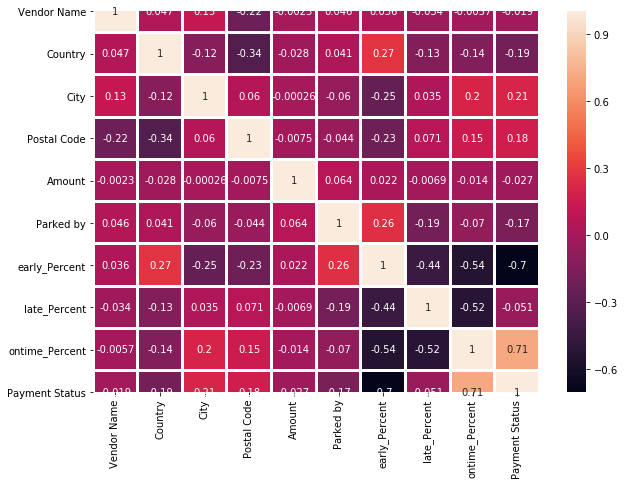

In [48]:
df_other_Features=df_other.iloc[:,2:]
df_other_Features=pd.concat([df_other_Features,df_other.iloc[:,0]],axis=1)
#df_other_Features=pd.concat([df_other_Features,df_other.iloc[:,13:]],axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(df_other_Features.corr(),annot=True,linewidths=2)

In [21]:
df_other_Features=df_other.iloc[:,1:1282]
df_other_Features=pd.concat([df_other_Features,df_final.loc[:,'Payment Status']],axis=1)
df_other_Features=df_other_Features.corr()
df_other_Features=df_other_Features.sort_values(by='Payment Status', ascending=False, axis=1)
df_other_Features.to_excel('Correlation_matrix1.xlsx')
df_other_Features

,Payment Status,Purchase Invoice WF: LIV DA - Approve / Reject R2.2 completed-Acc. Doc. Due Date Passed,Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed-Acc. Doc. Due Date Passed,Purchase invoice line created-Acc. Doc. Due Date Passed,Acc. Doc. Baseline Date-Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed,Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed-Purchase Invoice WF: Manual SES Creation completed,Purchase invoice payment terms changed-Acc. Doc. Due Date Passed,Acc. Doc. For Payment Block Removed-Acc. Doc. Due Date Passed,Purchase Invoice WF: Service Entry Sheet - Mass Release-R23 cancelled-Accounting document Invoice line created,Acc. Doc. Baseline Date-Purchase Invoice WF: Manual SES Creation completed,...,Purchase invoice vendor changed-Purchase invoice line created,Purchase invoice vendor changed-Purchase invoice vendor changed,Purchase subsequent debit payment block set-Purchase Subsequent Debit line created,Purchase subsequent debit payment terms changed-Acc. Doc. WF: LIV Price Block Decision A13 completed,Purchase subsequent debit payment terms changed-Purchase Invoice Line Quantity Difference Block removed,Purchase subsequent debit payment terms changed-Purchase Invoice WF: LIV Invoice Refresh completed,Purchase subsequent debit payment terms changed-Purchase Subsequent Debit line created,Purchase subsequent debit payment terms changed-Purchase subsequent debit payment block set,Vendor Creates Invoice-Accounting document Credit Memo Correction created,Vendor Creates Invoice-Accounting document Invoice line created
Acc. Doc. Baseline Date Changed-Acc. Doc. Baseline Date Changed,-0.002580,-0.001531,-0.001536,-0.005082,-0.001683,-0.002126,-0.001720,-0.000542,-0.000741,-0.000718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acc. Doc. Baseline Date Changed-Acc. Doc. Cash Discount Days Changed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acc. Doc. Baseline Date Changed-Acc. Doc. Due Date Passed,-0.008044,-0.004526,-0.004542,-0.015025,0.002871,0.009433,-0.005085,-0.001601,-0.002191,-0.002123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acc. Doc. Baseline Date Changed-Acc. Doc. For Payment Block Removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acc. Doc. Baseline Date Changed-Acc. Doc. Payment Method Changed,-0.002580,-0.001531,-0.001536,-0.005082,-0.001683,-0.002126,-0.001720,-0.000542,-0.000741,-0.000718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Select Appr from pop A13 completed,0.010170,-0.003830,-0.003844,-0.012716,-0.004211,-0.005320,-0.004304,-0.000073,-0.001854,-0.001796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor Creates Invoice-Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed,-0.010953,-0.008256,-0.008286,-0.027410,-0.009077,-0.011468,-0.009277,0.000204,-0.003997,-0.003872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor Creates Invoice-Accounting document Credit Memo Correction created,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor Creates Invoice-Accounting document Invoice line created,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
y=['CASE_KEY','Payment Status','late_Percent']
x=[i for i in df_other if i not in y]
y=['Payment Status']
x

['Vendor Name',
 'Country',
 'City',
 'Postal Code',
 'Amount',
 'Parked by',
 'early_Percent',
 'ontime_Percent']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(df_other[x], df_other[y], test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression classifier on test set: 0.78


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1163   55  119]
 [  71 1725  882]
 [ 131  488 3224]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1337
           1       0.76      0.64      0.70      2678
           2       0.76      0.84      0.80      3843

    accuracy                           0.78      7858
   macro avg       0.79      0.78      0.79      7858
weighted avg       0.78      0.78      0.78      7858



In [66]:
y=['CASE_KEY','Payment Status']
x=[i for i in df_other if i not in y]
y=['Payment Status']
x

['Vendor Name',
 'Country',
 'City',
 'Postal Code',
 'Amount',
 'Parked by',
 'early_Percent',
 'late_Percent',
 'ontime_Percent']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(df_other[x], df_other[y], test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression classifier on test set: 0.77


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1161   53  123]
 [  57 1419 1202]
 [ 132  230 3481]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1337
           1       0.83      0.53      0.65      2678
           2       0.72      0.91      0.80      3843

    accuracy                           0.77      7858
   macro avg       0.81      0.77      0.77      7858
weighted avg       0.78      0.77      0.76      7858



In [6]:
df.tail(20)

,CASE_KEY,ACTIVITY_EN,EVENTTIME,SORTING,Vendor Name,Country,City,Postal Code,Amount,Parked by,Payment Status,Late,Early,Ontime,early_Percent
0,110AT0115000200222019001,Vendor Creates Invoice,2019-05-08 00:00:00,10.0,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,3.231823e+02,PHRIG0,On-Time,0,0,1,0.000000
1,110AT0115000200222019001,Acc. Doc. Baseline Date,2019-05-13 00:00:00,50.0,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,3.231823e+02,PHRIG0,On-Time,0,0,1,0.000000
2,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,2019-05-15 03:06:54,NaN,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,3.231823e+02,PHRIG0,On-Time,0,0,1,0.000000
3,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...,2019-05-23 11:09:07,NaN,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,3.231823e+02,PHRIG0,On-Time,0,0,1,0.000000
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Select Appr from ...,2019-06-04 13:20:30,NaN,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,3.231823e+02,PHRIG0,On-Time,0,0,1,0.000000
5,110AT0115000200222019001,Accounting document Invoice line created,2019-06-04 13:20:39,10.0,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,3.231823e+02,PHRIG0,On-Time,0,0,1,0.000000
6,110AT0115000200222019001,Acc. Doc. Cleared,2019-06-12 23:59:59,50.0,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,3.231823e+02,PHRIG0,On-Time,0,0,1,0.000000
7,110AT0115000200222019001,Acc. Doc. Due Date Passed,2019-06-12 23:59:59,70.0,BEZIRKSHAUPTMANNSCHAFT,AT,VOECKLABRUCK,4840,3.231823e+02,PHRIG0,On-Time,0,0,1,0.000000
8,110AT0115000200942019001,Vendor Creates Invoice,2019-05-28 00:00:00,10.0,ASFINAG AUTOBAHNEN UND,AT,WIEN,1011,1.422859e+06,R_CPS_RFC,On-Time,2,16,43,0.262295
9,110AT0115000200942019001,Acc. Doc. Baseline Date,2019-05-28 00:00:00,50.0,ASFINAG AUTOBAHNEN UND,AT,WIEN,1011,1.422859e+06,R_CPS_RFC,On-Time,2,16,43,0.262295


In [ ]:
df = pd.read_excel(r"C:\\Users\\Shalini.M\\OneDrive - Shell\\Shalini\\Work\\Celonis\\Late Payment Prediction\\Schema4\\Schema4_Input1.xlsx")
df

In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26191 entries, 0 to 26190
Data columns (total 62 columns):
CASE_KEY                                                                                                                                     26191 non-null object
Acc. Doc. Cleared-Acc. Doc. Due Date Passed                                                                                                  26191 non-null int64
Vendor Creates Invoice-Purchase invoice document date                                                                                        26191 non-null int64
Purchase invoice status set to Posted-Purchase invoice payment terms changed                                                                 26191 non-null int64
Purchase invoice document date-Acc. Doc. Baseline Date                                                                                       26191 non-null int64
Accounting document Invoice line created-Purchase invoice line created          

In [46]:
df_act=df.iloc[:,:3].copy()
'''
df_act['rn'] = df_act.groupby(['CASE_KEY']).cumcount()+1;
df_act['TimeDiff'] = (df_act['EVENTTIME']-df_act['EVENTTIME'].shift()).fillna(0).dt.days
df_act['TimeDiff']=np.where(df_act['rn']==1,0,df_act['TimeDiff'])
df_act['Link'] = df_act['ACTIVITY_EN'].shift(-1)
df_act['TimeDiff1'] = df_act['TimeDiff'].shift(-1)
'''
df_act["dummy_count"]=1
df_act['cumsum'] = df_act.groupby(['CASE_KEY'])['dummy_count'].transform(lambda x: x.cumsum())
df_act['summation'] = df_act.groupby(['CASE_KEY'])['dummy_count'].transform(sum)
df_act["new_counter"]=df_act['summation']-df_act['cumsum']
df_act['new_column_connect']=df_act['ACTIVITY_EN']+"-"+df_act['Link']
df_act['new_column_connect']=np.where(df_act['new_counter']==0,df_act['ACTIVITY_EN'],df_act['new_column_connect'])
df_act.drop(df_act[df_act.new_counter==0].index, inplace=True)
df_act.drop(['ACTIVITY_EN','Link','dummy_count','cumsum','summation','new_counter'],axis=1,inplace=True)
df_act

C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,CASE_KEY,EVENTTIME,rn,TimeDiff,TimeDiff1,new_column_connect
0,110AT0115000200222019001,2019-05-08 00:00:00,1,0,5.0,Vendor Creates Invoice-Acc. Doc. Baseline Date
1,110AT0115000200222019001,2019-05-13 00:00:00,2,5,2.0,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI C...
2,110AT0115000200222019001,2019-05-15 03:06:54,3,2,8.0,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...
3,110AT0115000200222019001,2019-05-23 11:09:07,4,8,12.0,Acc. Doc. WF: FI Only Non PO Coder decision ta...
4,110AT0115000200222019001,2019-06-04 13:20:30,5,12,0.0,Acc. Doc. WF: FI Only Non PO Select Appr from ...
...,...,...,...,...,...,...
499994,110US1615001054402019001,2019-06-25 00:00:00,2,1,1.0,Acc. Doc. Baseline Date-Acc. Doc. WF: FI Only ...
499995,110US1615001054402019001,2019-06-26 06:38:35,3,1,0.0,Acc. Doc. WF: FI Only Non PO Coder decision ta...
499996,110US1615001054402019001,2019-06-27 04:07:27,4,0,0.0,Acc. Doc. WF: FI Only Non PO Select Appr from ...
499997,110US1615001054402019001,2019-06-27 04:07:31,5,0,57.0,Accounting document Invoice line created-Acc. ...


In [65]:
df_act

,CASE_KEY,EVENTTIME,rn,TimeDiff,TimeDiff1,new_column_connect
0,110AT0115000200222019001,2019-05-08 00:00:00,1,0,5.0,Vendor Creates Invoice-Acc. Doc. Baseline Date
1,110AT0115000200222019001,2019-05-13 00:00:00,2,5,2.0,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI C...
2,110AT0115000200222019001,2019-05-15 03:06:54,3,2,8.0,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...
3,110AT0115000200222019001,2019-05-23 11:09:07,4,8,12.0,Acc. Doc. WF: FI Only Non PO Coder decision ta...
4,110AT0115000200222019001,2019-06-04 13:20:30,5,12,0.0,Acc. Doc. WF: FI Only Non PO Select Appr from ...
...,...,...,...,...,...,...
499994,110US1615001054402019001,2019-06-25 00:00:00,2,1,1.0,Acc. Doc. Baseline Date-Acc. Doc. WF: FI Only ...
499995,110US1615001054402019001,2019-06-26 06:38:35,3,1,0.0,Acc. Doc. WF: FI Only Non PO Coder decision ta...
499996,110US1615001054402019001,2019-06-27 04:07:27,4,0,0.0,Acc. Doc. WF: FI Only Non PO Select Appr from ...
499997,110US1615001054402019001,2019-06-27 04:07:31,5,0,57.0,Accounting document Invoice line created-Acc. ...


In [51]:
df_act.loc[:,'TimeDiff1'].astype("int64")
df_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449940 entries, 0 to 499998
Data columns (total 6 columns):
CASE_KEY              449940 non-null object
EVENTTIME             449940 non-null datetime64[ns]
rn                    449940 non-null int64
TimeDiff              449940 non-null int64
TimeDiff1             449940 non-null float64
new_column_connect    449940 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 24.0+ MB


In [47]:
df_act.isna().sum()

CASE_KEY              0
EVENTTIME             0
rn                    0
TimeDiff              0
TimeDiff1             0
new_column_connect    0
dtype: int64

In [38]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449940 entries, 0 to 499998
Data columns (total 6 columns):
CASE_KEY              449940 non-null object
EVENTTIME             449940 non-null datetime64[ns]
rn                    449940 non-null int64
TimeDiff              449940 non-null int64
TimeDiff1             449940 non-null float64
new_column_connect    449940 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 24.0+ MB


In [30]:
df_act.head(20)

,CASE_KEY,ACTIVITY_EN,EVENTTIME,rn,TimeDiff
0,110AT0115000200222019001,Vendor Creates Invoice,2019-05-08 00:00:00,1,0
1,110AT0115000200222019001,Acc. Doc. Baseline Date,2019-05-13 00:00:00,2,5
2,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,2019-05-15 03:06:54,3,2
3,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...,2019-05-23 11:09:07,4,8
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Select Appr from ...,2019-06-04 13:20:30,5,12
5,110AT0115000200222019001,Accounting document Invoice line created,2019-06-04 13:20:39,6,0
6,110AT0115000200222019001,Acc. Doc. Cleared,2019-06-12 23:59:59,7,8
7,110AT0115000200222019001,Acc. Doc. Due Date Passed,2019-06-12 23:59:59,8,0
8,110AT0115000200942019001,Vendor Creates Invoice,2019-05-28 00:00:00,1,-16
9,110AT0115000200942019001,Acc. Doc. Baseline Date,2019-05-28 00:00:00,2,0


In [54]:
df_Pivot = df_act.pivot_table('TimeDiff1',['CASE_KEY'],'new_column_connect').fillna(0)
df_Pivot

new_column_connect,Acc. Doc. Baseline Date Changed-Acc. Doc. Baseline Date Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. Cash Discount Days Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. Cleared,Acc. Doc. Baseline Date Changed-Acc. Doc. Due Date Passed,Acc. Doc. Baseline Date Changed-Acc. Doc. For Payment Block Removed,Acc. Doc. Baseline Date Changed-Acc. Doc. Payment Method Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Enter Rejection Reason completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV Price Block Decision A13 completed,...,Vendor Creates Invoice-Acc. Doc. Cleared,Vendor Creates Invoice-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Coder decision task completed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Post parked document completed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Select Appr from pop A13 completed,Vendor Creates Invoice-Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed,Vendor Creates Invoice-Accounting document Credit Memo Correction created,Vendor Creates Invoice-Accounting document Invoice line created,Vendor Creates Invoice-Accounting document Invoice reversal created,Vendor Creates Invoice-Purchase invoice document date
CASE_KEY,,,,,,,,,,,,,,,,,,,,,
110AT0115000200222019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110AT0115000200942019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110AT0115000200952019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110AT0115000200982019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110AT0115000200992019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110US1615001054362019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110US1615001054372019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110US1615001054382019001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df_Pivot.to_excel('pivot.xlsx')

In [21]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
CASE_KEY       500000 non-null object
ACTIVITY_EN    500000 non-null object
EVENTTIME      500000 non-null datetime64[ns]
rn             500000 non-null int64
TimeDiff       500000 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 19.1+ MB


In [3]:
#Activities Information
df_act=df.iloc[:,:2].copy()
df_act['Link'] = df_act['ACTIVITY_EN'].shift(-1)
df_act["dummy_count"]=1
df_act['cumsum'] = df_act.groupby(['CASE_KEY'])['dummy_count'].transform(lambda x: x.cumsum())
df_act['summation'] = df_act.groupby(['CASE_KEY'])['dummy_count'].transform(sum)
df_act["new_counter"]=df_act['summation']-df_act['cumsum']
df_act['new_column_connect']=df_act['ACTIVITY_EN']+"-"+df_act['Link']
df_act['new_column_connect']=np.where(df_act['new_counter']==0,df_act['ACTIVITY_EN'],df_act['new_column_connect'])
df_act.drop(df_act[df_act.new_counter==0].index, inplace=True)
df_act.drop(['ACTIVITY_EN','Link','dummy_count','cumsum','summation','new_counter'],axis=1,inplace=True)
df_one_hot=pd.concat([pd.get_dummies(df_act['new_column_connect']), df_act['CASE_KEY']], axis=1)
df_one_hot.iloc[:,:-1].astype("int64")
y=['CASE_KEY']
columns=[i for i in df_one_hot if i not in y]
df_one_hot=df_one_hot.groupby('CASE_KEY')[columns].agg('sum')
df_one_hot=df_one_hot.append(df_one_hot.sum(axis=0).rename('Total'))
df_one_hot=df_one_hot.sort_values(by='Total', ascending=False, axis=1)
df_one_hot.drop(df_one_hot.iloc[:, 50:], inplace=True, axis=1)
df_one_hot.drop(df_one_hot.tail(1).index,inplace=True)
df_one_hot

,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Purchase invoice document date,Purchase invoice status set to Posted-Purchase invoice payment terms changed,Purchase invoice document date-Acc. Doc. Baseline Date,Accounting document Invoice line created-Purchase invoice line created,Purchase invoice payment terms changed-Purchase invoice line created,Accounting document Invoice line created-Purchase invoice status set to Posted,Vendor Creates Invoice-Acc. Doc. Baseline Date,Purchase invoice line created-Acc. Doc. Cleared,Acc. Doc. Due Date Passed-Acc. Doc. Cleared,...,Purchase Invoice WF: LIV DA - Approve / Reject R2.2 completed-Acc. Doc. Cleared,Acc. Doc. Baseline Date-Purchase invoice line created,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed,Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed-Acc. Doc. Cleared,Purchase Invoice WF: SER LIV Inv - Exception Screen-IRN14 completed-Accounting document Invoice line created,Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed-Acc. Doc. WF: FI Only Non PO Coder decision task completed,Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed-Acc. Doc. Cleared,Purchase Invoice WF: SER LIV Inv - Exception Screen-IRN14 completed-Acc. Doc. Baseline Date,Purchase invoice payment terms changed-Acc. Doc. Cleared,Purchase Invoice WF: Service Entry Sheet - Mass Release-R23 cancelled-Accounting document Invoice line created
CASE_KEY,,,,,,,,,,,,,,,,,,,,,
110AT0115000200222019001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
110AT0115000200942019001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
110AT0115000200952019001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110AT0115000200982019001,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
110AT0115000200992019001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110US1615001054362019001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110US1615001054372019001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110US1615001054382019001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Other COlumns
df_other=df.copy()

df_other.loc[df_other['Parked by'].str.len() == 6, 'Parked by'] = 'User'
df_other.loc[df_other['Parked by'].str.len() > 6, 'Parked by'] = 'Batch'

df_other=df_other.groupby(['Payment Status','CASE_KEY','Vendor Name','Country','City','Postal Code','Account group','Amount','Parked by'], 
                          as_index=False)['Day_of_week','Day_of_month','Year End'].first()
values=df_other['Payment Status']
label_encoder=LabelEncoder()
df_other['Payment Status']=label_encoder.fit_transform(values)

values=df_other['Parked by']
label_encoder=LabelEncoder()
df_other['Parked by']=label_encoder.fit_transform(values)

values=df_other['Vendor Name']
label_encoder=LabelEncoder()
df_other['Vendor Name']=label_encoder.fit_transform(values)

values=df_other['Country']
label_encoder=LabelEncoder()
df_other['Country']=label_encoder.fit_transform(values)

values=df_other['City']
label_encoder=LabelEncoder()
df_other['City']=label_encoder.fit_transform(values)

values=df_other['Account group']
label_encoder=LabelEncoder()
df_other['Account group']=label_encoder.fit_transform(values)

values=df_other['Postal Code']
label_encoder=LabelEncoder()
df_other['Postal Code']=label_encoder.fit_transform(values)

values=df_other['Year End']
label_encoder=LabelEncoder()
df_other['Year End']=label_encoder.fit_transform(values)

# Binning amount and encoding
df_other['Amount']=pd.qcut(df_other['Amount'], q=4)
values=df_other['Amount']
label_encoder=LabelEncoder()
df_other['Amount']=label_encoder.fit_transform(values)

df_other

In [14]:
df_other

,Payment Status,CASE_KEY,Vendor Name,Country,City,Postal Code,Account group,Amount,Parked by,Day_of_week,Day_of_month,Year End,rn
0,0,110AT0115000200982019001,1218,2,1704,397,0,3,1,2,28,0,1
1,0,110AT0115000201002019001,357,2,1704,307,1,3,1,4,30,0,1
2,0,110AT0115000201072019001,357,2,1704,307,1,3,1,5,31,0,1
3,0,110AT0115000201092019001,357,2,1704,307,1,2,0,4,30,0,1
4,0,110AT0115000201232019001,357,2,1704,307,1,2,1,5,31,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26186,2,110US1615001054282019001,2386,57,309,2032,1,1,1,1,24,0,1
26187,2,110US1615001054292019001,2423,57,281,1333,1,0,1,1,24,0,1
26188,2,110US1615001054322019001,2386,57,309,2032,1,1,1,1,24,0,1
26189,2,110US1615001054342019001,2386,57,309,2032,1,1,1,1,24,0,1


In [11]:
df_final=pd.merge(df_one_hot,df_other,how='inner',on=['CASE_KEY'])
df_final

,CASE_KEY,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Purchase invoice document date,Purchase invoice status set to Posted-Purchase invoice payment terms changed,Purchase invoice document date-Acc. Doc. Baseline Date,Accounting document Invoice line created-Purchase invoice line created,Purchase invoice payment terms changed-Purchase invoice line created,Accounting document Invoice line created-Purchase invoice status set to Posted,Vendor Creates Invoice-Acc. Doc. Baseline Date,Purchase invoice line created-Acc. Doc. Cleared,...,Vendor Name,Country,City,Postal Code,Account group,Amount,Parked by,Day_of_week,Day_of_month,Year End
0,110AT0115000200222019001,1,0,0,0,0,0,0,1,0,...,561,2,1653,2163,0,0,1,3,8,0
1,110AT0115000200942019001,1,0,0,0,0,0,0,1,0,...,357,2,1704,307,1,3,0,2,28,0
2,110AT0115000200952019001,1,0,0,0,0,0,0,1,0,...,357,2,1704,307,1,2,0,1,27,0
3,110AT0115000200982019001,0,0,0,0,0,0,0,1,0,...,1218,2,1704,397,0,3,1,2,28,0
4,110AT0115000200992019001,1,0,0,0,0,0,0,1,0,...,357,2,1704,307,1,3,1,3,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26186,110US1615001054362019001,1,0,0,0,0,0,0,1,0,...,3281,57,281,1333,1,0,1,1,24,0
26187,110US1615001054372019001,1,0,0,0,0,0,0,1,0,...,3281,57,281,1333,1,0,1,1,24,0
26188,110US1615001054382019001,1,0,0,0,0,0,0,1,0,...,3281,57,281,1333,1,0,1,1,24,0
26189,110US1615001054392019001,1,0,0,0,0,0,0,1,0,...,2386,57,309,2032,1,1,1,1,24,0


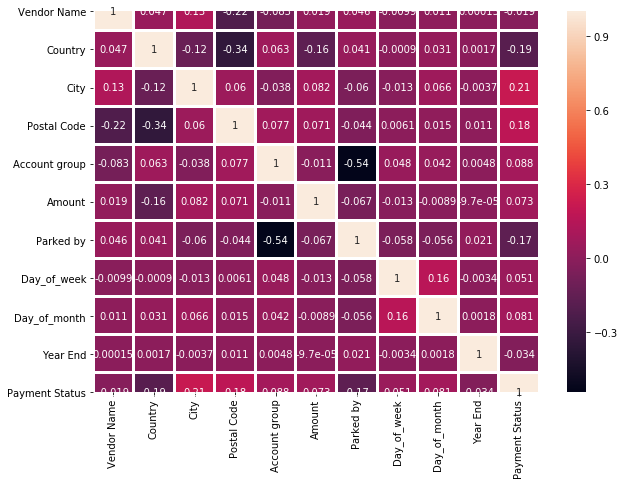

In [63]:
df_other_Features=df_other.iloc[:,2:-1]
df_other_Features=pd.concat([df_other_Features,df_other.iloc[:,0]],axis=1)
#df_other_Features=pd.concat([df_other_Features,df_other.iloc[:,13:]],axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(df_other_Features.corr(),annot=True,linewidths=2)

In [ ]:
df_other_Features=df_other.iloc[:,2:-1]
df_other_Features=pd.concat([df_other_Features,df_other.iloc[:,0]],axis=1)
#df_other_Features=pd.concat([df_other_Features,df_other.iloc[:,13:]],axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(df_other_Features.corr(),annot=True,linewidths=2)

In [62]:
df_other

,Payment Status,CASE_KEY,Vendor Name,Country,City,Postal Code,Account group,Amount,Parked by,Day_of_week,Day_of_month,Year End,rn
0,0,110AT0115000200982019001,1218,2,1704,397,0,3,1,2,28,0,1
1,0,110AT0115000201002019001,357,2,1704,307,1,3,1,4,30,0,1
2,0,110AT0115000201072019001,357,2,1704,307,1,3,1,5,31,0,1
3,0,110AT0115000201092019001,357,2,1704,307,1,2,0,4,30,0,1
4,0,110AT0115000201232019001,357,2,1704,307,1,2,1,5,31,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26186,2,110US1615001054282019001,2386,57,309,2032,1,1,1,1,24,0,1
26187,2,110US1615001054292019001,2423,57,281,1333,1,0,1,1,24,0,1
26188,2,110US1615001054322019001,2386,57,309,2032,1,1,1,1,24,0,1
26189,2,110US1615001054342019001,2386,57,309,2032,1,1,1,1,24,0,1
